In [0]:
! pip install networkx
! pip install plotly
! pip install colorlover

In [0]:
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import colorlover as cl
from IPython.display import HTML
import nltk
from nltk.corpus import stopwords
import re

In [0]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

#Q1 Choose a hashtag
choose #wordpress.

In [0]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)
hashTagsCounter.most_common(100)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

#Q2 (a) Count number of nodes and edges

The # of nodes: 413

The # of edges: 366

In [0]:
wordpressTag = df[df["tweet"].str.lower().str.contains("#wordpress", na=False)].copy()

In [0]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
addMentionedColumn(wordpressTag)

In [0]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [0]:
wordpressGraph = mentionGraph(wordpressTag)

In [0]:
print("# nodes:", len(wordpressGraph.nodes()))
print("# edges:", len(wordpressGraph.edges()))

# nodes: 413
# edges: 366


In [0]:
wordpressTag.head(10)

,date,user,tweet,mentioned
11178,2009-06-11 17:13:37,frankstepanski,WordPress 2.8 Is OUT! http://wordpress.org/dow...,[]
11429,2009-06-11 17:13:49,designresources,RT @spicydesign: 10 Social Media #Plugins for ...,[spicydesign]
18214,2009-06-11 17:22:52,bbeazely,WordPress 2.8 Now Available for Download | Mas...,[weblittlepieces)]
23141,2009-06-11 17:30:52,ezs,New post on #wordpress filesystem abstraction ...,[]
26453,2009-06-11 17:35:59,gopalraju,RT @iBlend: RT @webdesign_news: 10 Social Medi...,"[iblend, webdesign_news]"
27107,2009-06-11 17:37:03,afrognthevalley,Taking your questions for our opening session ...,[photomatt]
27762,2009-06-11 17:38:55,jbcartist,#wordpress 2.8 released. Looks smooth http://b...,[]
28659,2009-06-11 17:40:55,pauloflaherty,WordPress 2.8 takes a step backwards | PaulOFl...,[]
29605,2009-06-11 17:42:35,dahowlett,RT @pauloflaherty: WordPress 2.8 takes a step ...,[pauloflaherty]
34534,2009-06-11 17:50:42,wordpress_work,#wordpress Site Template Needed: I have the st...,[]


#Q2 (b) Histogram of the graph nodes' degree

The majority of users only one node degree and only a few accounts are connected by many people.

DegreeView({'designresources': 1, 'spicydesign': 9, 'bbeazely': 1, 'weblittlepieces)': 1, 'gopalraju': 2, 'iblend': 3, 'webdesign_news': 6, 'afrognthevalley': 1, 'photomatt': 2, 'dahowlett': 1, 'pauloflaherty': 3, 'bnotw': 1, 'vincentabry': 1, 'pauloelias': 1, '': 3, 'c0der': 1, 'slaff': 1, 'hashwordpress': 13, 'baires': 1, 'area1': 12, 'induslogic': 1, 'mushon': 1, 'harrisonkeith': 2, 'stevensnell': 1, 'nathanrice': 2, 'steffenster': 1, 'webdemar': 1, 'alexfalk': 1, 'twitter': 1, 'iheartwordpress': 13, 'halophoenix': 1, 'blingafe': 2, 'robinmwood': 8, 'iifoliodesign': 2, 'randyjensen': 1, 'therobbrennan': 1, 'ppatel': 1, 'plumlipstick': 1, 'lbcislander': 2, 'raffale': 1, 'danblackburn': 1, 'joannsondy': 1, 'iandstewart': 1, 'flowsionet': 1, 'linuxhobby': 1, 'kirin_lin': 1, 'wpdimension': 2, 'dani': 4, 'lboi': 7, 'speakeasy602': 1, 'ezyblogger': 1, 'davidrisley': 1, 'tweetmeme': 1, 'highrockthemes': 2, 'artisteerhelp': 2, 'highrockmedia': 4, 'veggie2u': 1, 'jonasl': 10, 'daniellebaldwi

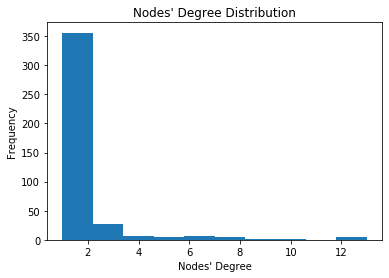

In [0]:
degree_values = [v for k, v in nx.degree(wordpressGraph)]
plt.hist(degree_values)
plt.title("Nodes' Degree Distribution")
plt.xlabel("Nodes' Degree")
plt.ylabel("Frequency")
nx.degree(wordpressGraph)


#Q2 (c) List of top 5 edges with highest weights

In [0]:
edgeList = []
for node1, node2 in wordpressGraph.edges():
  edgeList.append([node1, node2, wordpressGraph[node1][node2]['numberMentions']])
    
edgeDf = pd.DataFrame(edgeList)
edgeDf.columns = ["Node 1", "Node 2", "Weight"]
edgeDf.sort_values('Weight',ascending=0).head(5)

,Node 1,Node 2,Weight
170,textimps,danielfelice,3
273,ruhanirabin,thefelixmolina,3
41,area1,robinmwood,3
30,hashwordpress,robinmwood,3
51,area1,bebopdesigner,3


#Q2 (d) Visualization of the mention graph with different edge colours reflecting its weight

In [0]:
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)
addRandomPositions(wordpressGraph)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
def plotNetwork(graph, minEdgeWeight,maxEdgeWeight):
  scatters=[]

  for (node1, node2) in graph.edges():
    x0, y0 = graph.nodes[node1]['pos']
    x1, y1 = graph.nodes[node2]['pos']
    edgeWidth = graph[node1][node2]['numberMentions']
    lineColor = int(299*(edgeWidth-minEdgeWeight)/(maxEdgeWeight-minEdgeWeight))
    s = Scatter(
            x=[x0, x1],
            y=[y0, y1],
            hoverinfo='none',
            mode='lines', 
            line=scatter.Line(width=1 ,color=bupu300[lineColor]))
    scatters.append(s)



  for node in graph.nodes():
    xPos, yPos = graph.nodes[node]['pos']

    s = Scatter(
            x=[xPos], 
            y=[yPos], 
            hoverinfo='none',
            mode='markers', 
            marker=dict(
                color="#888", 
                size=10,         
                line=dict(width=2)))
    scatters.append(s)
    
  layout = Layout(showlegend=False)
  fig = Figure(data=scatters, layout=layout)
  iplot(fig, show_link=False)

In [0]:
bupu = cl.scales['9']['seq']['BuPu']
bupu300 = cl.interp(bupu, 300)
HTML(cl.to_html(bupu300))

In [0]:
configure_plotly_browser_state()
minEdgeWeight = min(edgeDf["Weight"].values)
maxEdgeWeight = max(edgeDf["Weight"].values)
plotNetwork(wordpressGraph,minEdgeWeight,maxEdgeWeight)

#Q3 (a) Most common words with the chosen hash-tag

The main themes of the hashtag is about the wordpress features. For example, wordpress is a 'free' 'website' for building 'blogs' with dozens of 'designs' and 'themes'.

In [0]:
tweet = wordpressTag['tweet'].values

nltk.download("stopwords")
stop = set(stopwords.words('english'))
stop.add('http')
stop.add('www')
stop.add('com')
stop.add('wordpress')
stop.add('2009')
stop.add('via')
# Top-k frequent terms
counter = Counter()
for review in tweet:
  counter.update([word.lower() 
                for word 
                in re.findall(r'\w+', review) 
                if word.lower() not in stop and len(word) > 2 
                and not word.startswith("@")
                and not word.startswith("#")
                and not word.startswith("http")])
topk = counter.most_common(20)        
topk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('bit', 270),
 ('blog', 98),
 ('tinyurl', 54),
 ('plugin', 54),
 ('plugins', 52),
 ('new', 52),
 ('free', 49),
 ('theme', 48),
 ('site', 44),
 ('themes', 44),
 ('upgrade', 43),
 ('design', 41),
 ('need', 38),
 ('cli', 36),
 ('resources', 36),
 ('know', 33),
 ('things', 31),
 ('developers', 30),
 ('website', 27),
 ('tutorials', 25)]

#Q3 (b) Visualization of the mention graph, add hover 3 most common words for the nodes

In [0]:
userWords = {}
for user in wordpressGraph.nodes():
  tweet = wordpressTag.loc[wordpressTag['user']==user]['tweet'].values
  counter = Counter()
  for review in tweet:
    counter.update([word.lower() 
                  for word 
                  in re.findall(r'\w+', review) 
                  if word.lower() not in stop and len(word) > 2 
                  and not word.startswith("@")
                  and not word.startswith("#")
                  and not word.startswith("http")])
  topkWords = counter.most_common(3)        

  tweetCount = len(wordpressTag.loc[wordpressTag['user']==user]['tweet'])
            
  userWords[user] = {'tweetCount':tweetCount, 'words':topkWords}

In [0]:
def plotNetworkwithTopk(graph, minEdgeWeight,maxEdgeWeight,userTopk = {}):
  scatters=[]

  for (node1, node2) in graph.edges():
    x0, y0 = graph.nodes[node1]['pos']
    x1, y1 = graph.nodes[node2]['pos']
    edgeWidth = graph[node1][node2]['numberMentions']
    lineColor = int(299*(edgeWidth-minEdgeWeight)/(maxEdgeWeight-minEdgeWeight))
    s = Scatter(
            x=[x0, x1],
            y=[y0, y1],
            hoverinfo='none',
            mode='lines', 
            line=scatter.Line(width=1 ,color=bupu300[lineColor]))
    scatters.append(s)



  for node in graph.nodes():
    xPos, yPos = graph.nodes[node]['pos']
    if str(userTopk[node]["words"]) == "[]":
      labelText = "user" + str(node) + " NA"
    else: labelText = "user:" + str(node) + ' ' + str(userTopk[node]["words"])
    
    s = Scatter(
            x=[xPos], 
            y=[yPos], 
            text = labelText,
            hoverinfo='text',
            mode='markers', 
            marker=dict(
                color="#888", 
                size=10,         
                line=dict(width=2)))
    scatters.append(s)
    
  layout = Layout(showlegend=False)
  fig = Figure(data=scatters, layout=layout)
  iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkwithTopk(wordpressGraph,minEdgeWeight,maxEdgeWeight,userWords)

#Q4 (a) Calculate closeness and betweenness

In [0]:
#choose closeness and betweenness
closenessCentr = nx.closeness_centrality(wordpressGraph)
betweennessCentr = nx.betweenness_centrality(wordpressGraph)

#Q4 (b) Visualization that demonstrates the centrality of each node

In [0]:
def plotNetworkSizeColor(graph,centrality,measure):
    maxCentr = max(centrality.values())
    minCentr = min(centrality.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = centrality[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        if measure == "closeness":
          labelText = "User: %s\nCloseness: %.3f" % (node, nodeCentr)
        else: labelText = "User: %s\nBetweenness: %.3f" % (node, nodeCentr)
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text=labelText,
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=bupu300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor(wordpressGraph,closenessCentr,"closeness")

In [0]:
configure_plotly_browser_state()
plotNetworkSizeColor(wordpressGraph,betweennessCentr,"betweenness")

#Q4 (c)

1. The results from two measures are very similar as observed from two similar social network graphs. Betweenness is a measure of the number of times of a node acts as a bridge along the shortest path between two nodes and closeness is a measure of how long it will take to spread information to all other nodes. They are commonly related because they are defined in terms fo shortest paths. Nodes with high closeness tend to have high betweenness.

2. Betweenness produces a more meaningful interpretation than closeness. Closeness could have all nodes have a similar score in a highly connected network.


#Q5 (a) Calculate the number of maximal cliques, clique number, number_of_cliques and node_clique_number.

In [0]:
#Number of maximal cliques in your graph.
print ("The number of maximal cliques is", len([clique for clique in nx.find_cliques(wordpressGraph)]))

The number of maximal cliques is 324


In [0]:
#The graph's clique number (size of the largest clique in the graph)
print ("The graph's clique number is",nx.graph_clique_number(wordpressGraph))

The graph's clique number is 4


In [0]:
#Number of maximal cliques for each node
nx.number_of_cliques(wordpressGraph)

{'': 3,
 '0lli': 5,
 '5tuarth': 1,
 '_miko': 1,
 'absolutelytrue': 1,
 'adamchamness': 1,
 'adamkaledeernest': 1,
 'addthis': 1,
 'afrognthevalley': 1,
 'aghausman': 4,
 'airlineroute': 1,
 'alan_knox': 5,
 'alapoet)': 1,
 'alexfalk': 1,
 'allen099': 1,
 'andrea_r': 2,
 'andreasnrb': 1,
 'andysowards': 2,
 'ann_sieg': 1,
 'annagrassi': 2,
 'aravindajith': 1,
 'aravindajith)': 1,
 'area1': 10,
 'arnaudt': 2,
 'arnuvo': 1,
 'artisteerhelp': 1,
 'arunkamath02': 1,
 'ashton_sanders': 1,
 'baires': 1,
 'barihossain': 5,
 'barihossain)': 1,
 'barrymadden': 1,
 'barryroodt': 1,
 'basilakis': 2,
 'bassyc': 1,
 'bbeazely': 1,
 'beaconhillnw': 1,
 'bebopdesigner': 2,
 'ben_sky': 1,
 'beparadigm': 1,
 'beuq': 1,
 'bigbags': 3,
 'billwolff': 1,
 'bitlockers': 1,
 'bjoern': 1,
 'bkmacdaddy': 5,
 'bkmacdaddy)': 2,
 'bkmacdaddy:#wordpress': 1,
 'blingafe': 1,
 'blondishnet': 1,
 'bnotw': 1,
 'bobbyzzzz': 10,
 'briancarl': 1,
 'brianchappell': 1,
 'briefepisode': 1,
 'bsains': 1,
 'bwjackson': 2,
 'c0

In [0]:
#the size of the largest maximal clique containing each given node.
nx.node_clique_number(wordpressGraph)

{'': 2,
 '0lli': 2,
 '5tuarth': 2,
 '_miko': 3,
 'absolutelytrue': 2,
 'adamchamness': 2,
 'adamkaledeernest': 2,
 'addthis': 2,
 'afrognthevalley': 2,
 'aghausman': 2,
 'airlineroute': 2,
 'alan_knox': 2,
 'alapoet)': 2,
 'alexfalk': 2,
 'allen099': 2,
 'andrea_r': 2,
 'andreasnrb': 2,
 'andysowards': 2,
 'ann_sieg': 2,
 'annagrassi': 2,
 'aravindajith': 2,
 'aravindajith)': 2,
 'area1': 3,
 'arnaudt': 2,
 'arnuvo': 2,
 'artisteerhelp': 3,
 'arunkamath02': 2,
 'ashton_sanders': 2,
 'baires': 2,
 'barihossain': 3,
 'barihossain)': 2,
 'barrymadden': 2,
 'barryroodt': 2,
 'basilakis': 2,
 'bassyc': 2,
 'bbeazely': 2,
 'beaconhillnw': 2,
 'bebopdesigner': 3,
 'ben_sky': 2,
 'beparadigm': 2,
 'beuq': 2,
 'bigbags': 2,
 'billwolff': 2,
 'bitlockers': 2,
 'bjoern': 2,
 'bkmacdaddy': 2,
 'bkmacdaddy)': 2,
 'bkmacdaddy:#wordpress': 2,
 'blingafe': 3,
 'blondishnet': 2,
 'bnotw': 2,
 'bobbyzzzz': 2,
 'briancarl': 2,
 'brianchappell': 2,
 'briefepisode': 2,
 'bsains': 2,
 'bwjackson': 2,
 'c0de

#Q5 (b) Insights

Based on the calculation from (a), this networks has lots of cliques but their sizes are very small. The largest clique is between nodes "dani", " hashwordpress", "lboi" and "robinwood". The size of the largest clique is 4. The majority of users are in small groups.